test


(6.5, 6)

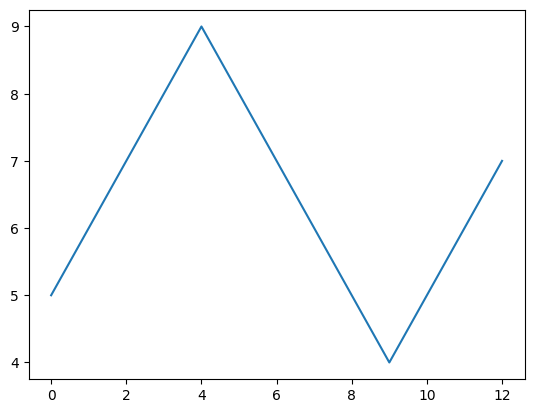

test


(6.5, 6)

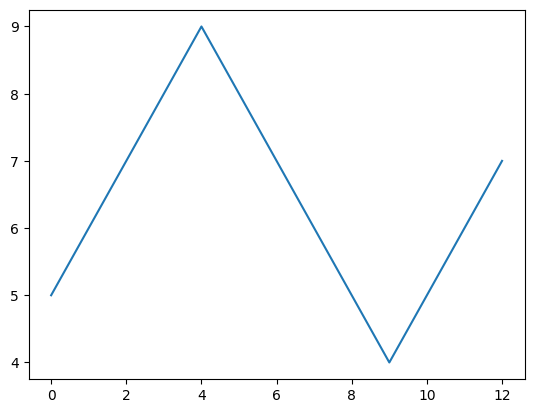

test


(6.5, 6)

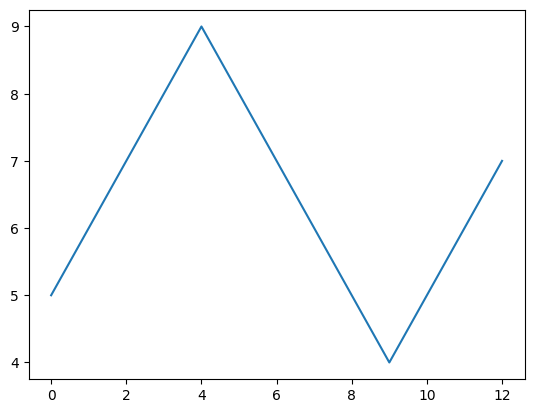

In [3]:
import matplotlib.pyplot as plt

print("test")

def findMiddleCrossing(indexPeak1, indexPeak2, ydata):
    extremum1 = ydata[indexPeak1]; extremum2 = ydata[indexPeak2]
    mCrossVal = (extremum1 + extremum2) /2
    closest_value = min(ydata[indexPeak1:indexPeak2], key=lambda x: abs(mCrossVal - x))
    mCrossIndex = ydata[indexPeak1:indexPeak2].index(closest_value) + indexPeak1
    return mCrossVal, mCrossIndex


ydata = [5,6,7,8,9,8,7,6,5,4,5,6,7]
xdata = range(0,len(ydata))
plt.plot(xdata, ydata)
findMiddleCrossing(5, 10, ydata)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Force = lambda aziAngle, :

#CA_eq: contact angle as a function of aziumthal angle. Ca: local normal velocity
#L: ?       a: ?
CA_app = lambda aziAngle, CA_eq, Ca, L, a: CA_eq(aziAngle) + (9*Ca*np.log(L/a))

In [11]:
import cv2
import numpy as np
from line_method import click_event, coordinates_on_line
##linmethod: pointa = 1766, 1782; pointb = 1928, 1916
# Read RGB image
img = cv2.imread('I:\\2023_04_06_PLMA_HexaDecane_Basler2x_Xp1_24_s11_split____GOODHALO-DidntReachSplit\\D_analysis_v2\PROC_20230612121104\\rawslicesimage\\rawslicesimage_Basler_a2A5328-15ucBAS__40087133__20230406_131652896_0023_analyzed_.png')


#imgblack = cv2.imread('C:\\Users\\Sander PC\\PycharmProjects\\InterferometryPython\\red square.png')
imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
squareSize = 10
resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

pixellocationLarge = 2250
pixellocationLarge2 = 2950

#x_offset = 468
#y_offset = 114

a = 0.827846
b = -183.776
limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax
coordinates, l = coordinates_on_line(a, b, limits)      #INCORRECT VGM. ZELF BEREKEND=1852
print(f"Length of line is {l}. (Image in plot)")

x_coords = [1766, 1928]
y_coords = [1782, 1916]
aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])
bL = y_coords[0] - a * x_coords[0]
print(f"(Large plot). a ={aL}, b = {bL}")
limitsL = [0, 5328, 0, 4608]
coordinatesLarge, lLarge = coordinates_on_line(aL, bL, limitsL)
print(f"Length of line is {lLarge}. (Large plot)")

ratioLines = lLarge / 1852
pixelLocNew = pixellocationLarge / ratioLines
print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixellocationLarge}, pixelLocNew = {pixelLocNew}")
#pixely = round(a*(pixelLocNew+466) + b)

#x_offset = round(pixelLocNew)  + 466
#y_offset = pixely

c = pixelLocNew     #c = length of line (schuine zijde)
#x_offset = round((-a*b + np.sqrt(c**2 + a**2 * c**2 - b**2)) / (1+a**2))
x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
pixely = round(a*(x_offset) + b)
y_offset = pixely
print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")

resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack
cv2.imshow('image', resizedimg)
right_clicks = []
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        right_clicks.append([x, y])
    if len(right_clicks) == 2:
        cv2.destroyAllWindows()

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)

P1 = np.array(right_clicks[0])
P2 = np.array(right_clicks[1])
print(f"Selected coordinates: {P1=}, {P2=}.")
print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")

cv2.destroyAllWindows()


Length of line is 2172.0. (Image in plot)
(Large plot). a =0.8271604938271605, b = 320.023964
Length of line is 6727.57713524293. (Large plot)
ratioLines = 3.6326010449475863, pixelLocLarge = 2250, pixelLocNew = 619.39089158426
pixelLocNew=619.39089158426 x=938, y = 593
Selected coordinates: P1=array([471, 203]), P2=array([1067,  697]).
Selected coordinates: P1 = [471, 203], P2 = [1067, 697]


In [1]:
####Working for hexadecane      (pixelLocation working properly). Change P1 & P2 for other rawsliceimages
import glob
import os.path
import cv2
import numpy as np
import csv
from line_method import click_event, coordinates_on_line
""""
This part is to show dots of pixellocations for all swellingImages, without clickingevents (below; to obtain required sizes in pixels etc.).
"""
##linmethod: pointa = 1766, 1782; pointb = 1928, 1916
# Read RGB image
source = 'D:\\2023_04_06_PLMA_HexaDecane_Basler2x_Xp1_24_s11_split____GOODHALO-DidntReachSplit\\D_analysisv4\\PROC_20230724185238'
imgList = [f for f in glob.glob(os.path.join(source, f"rawslicesimage\\*.png"))]
pixellocationLarge = [0, 2250, 2550, 6707]#2170
CLICKEVENT = False
n = 0
#nAllImages = np.arange(0, len(imgList),1)
nAllImages = [0,1]
print(f"Total amount of images in folder: {len(imgList)}. \nTotal amount of images used: {len(nAllImages)}")
for imgPath in imgList:
    if n in nAllImages:
        img = cv2.imread(imgPath)
        csvList = [f for f in glob.glob(os.path.join(source, f"csv\\*unwrapped.csv"))]

        #imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\red square.png')
        imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
        resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
        squareSize = 5
        resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

        def calcLineEquation(x_coords, y_coords):       #For eq   y = ax +b
            aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])    #a = dy /dx
            bL = y_coords[0] - aL * x_coords[0]                          #b = y(x) - a*x
            return aL, bL
        def calcLineLength(edge1, edge2):   #edge1(x,y)    edge2(x,y)
            return ((edge2[0] - edge1[0])**2 + (edge2[1] - edge1[1])**2 )**0.5
        def readInDataLengthLargeImage(csvList):
            with open(csvList[0]) as f:
                summation = sum(1 for line in f)
            return summation-1

        #P1 and P2 along the draw line of Image in plot.
        #INPUT EDGES OF THE LINE WITH BORDER OF IMAGE IN PLOT AS (P1 = [x,y])
        #Check this in e.g. paint.net with the cursor
        P1 = [466, 206]
        #P2 = [1091, 725]
        P2 = [1892, 1382]           #For hexadecane
        a, b = calcLineEquation([P1[0], P2[0]], [P1[1], P2[1]])
        limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax of image in plot. Should always be same
        l = calcLineLength(P1, P2)
        print(f"Image in plot: length calculated is {l} from edges")

        #x_coords = [1766, 1782]
        #y_coords = [1928, 1916]
        #aL, bL = calcLineEquation(x_coords, y_coords)
        #print(f"(Large plot). a ={aL}, b = {bL}")
        lLarge = readInDataLengthLargeImage(csvList)    #read in OG image data length of line from counting rows in csv file
        print(f"Length of data in Large image= {lLarge}")
        ratioLines = lLarge / l

        for i, pixelLocation in enumerate(pixellocationLarge):
            pixelLocNew = pixelLocation / ratioLines
            print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixelLocation}, pixelLocNew = {pixelLocNew}")

            c = pixelLocNew     #c = length of line (schuine zijde)
            x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
            pixely = round(a*(x_offset) + b)
            y_offset = pixely
            print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")
            resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack
            resizedimg = cv2.putText(resizedimg, f"pix: {pixelLocation}", [2000, 120+i*30], cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 4)
            if CLICKEVENT:
                cv2.imshow('image', resizedimg)
                right_clicks = []
                def click_event(event, x, y, flags, params):
                    if event == cv2.EVENT_LBUTTONDOWN:
                        right_clicks.append([x, y])
                    if len(right_clicks) == 2:
                        cv2.destroyAllWindows()

                cv2.setMouseCallback('image', click_event)
                cv2.waitKey(0)
                P1 = np.array(right_clicks[0])
                P2 = np.array(right_clicks[1])
                print(f"Selected coordinates: {P1=}, {P2=}.")
                print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")
                cv2.destroyAllWindows()
        if not os.path.exists(os.path.join(source, f"rawslicesimage\\pixelLocation")):
            os.mkdir(os.path.join(source, f"rawslicesimage\\pixelLocation"))
        cv2.imwrite(os.path.join(source, f"rawslicesimage\\pixelLocation\\rawlsiceimageWithPixelLocation{n}.png") , resizedimg)
    n = n+1


Total amount of images in folder: 0. 
Total amount of images used: 2


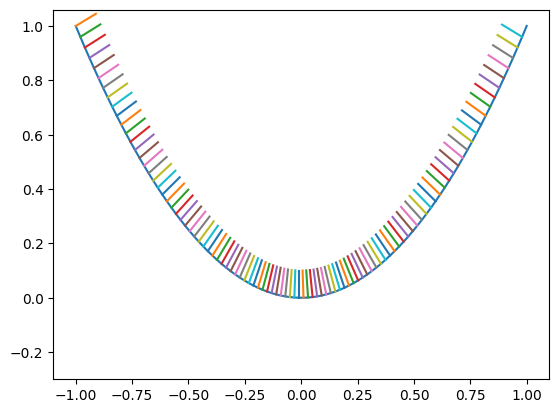

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def get_normals(length=.1):
    for idx in range(len(x)-1):
        x0, y0, xa, ya = x[idx], y[idx], x[idx+1], y[idx+1]
        dx, dy = xa-x0, ya-y0
        norm = math.hypot(dx, dy) * 1/length
        dx /= norm
        dy /= norm

        ax.plot((x0, x0-dy), (y0, y0+dx))    # plot the normals

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8, 8]

x = np.linspace(-1, 1, 100)
y = x**2
ax.set_ylim(-0.3, 1.06)
ax.plot(x, y)
get_normals()


plt.show()

array([5.31657693e-06, 5.32461099e-06, 5.34875360e-06, 5.38912607e-06,
       5.44593062e-06, 5.51945039e-06, 5.61004946e-06, 5.71817286e-06,
       5.84434650e-06, 5.98917709e-06, 6.15335188e-06, 6.33763837e-06,
       6.54288376e-06, 6.77001429e-06, 7.02003426e-06, 7.29402482e-06,
       7.59314244e-06, 7.91861700e-06, 8.27174946e-06, 8.65390916e-06,
       9.06653055e-06, 9.51110946e-06, 9.98919882e-06, 1.05024038e-05,
       1.10523763e-05, 1.16408089e-05, 1.22694283e-05, 1.29399874e-05,
       1.36542581e-05, 1.44140218e-05, 1.52210607e-05, 1.60771478e-05,
       1.69840359e-05, 1.79434472e-05, 1.89570610e-05, 2.00265022e-05,
       2.11533285e-05, 2.23390173e-05, 2.35849530e-05, 2.48924129e-05,
       2.62625542e-05, 2.76963999e-05, 2.91948254e-05, 3.07585446e-05,
       3.23880969e-05, 3.40838338e-05, 3.58459066e-05, 3.76742537e-05,
       3.95685894e-05, 4.15283928e-05, 4.35528981e-05, 4.56410848e-05,
       4.77916700e-05, 5.00031009e-05, 5.22735494e-05, 5.46009070e-05,
      

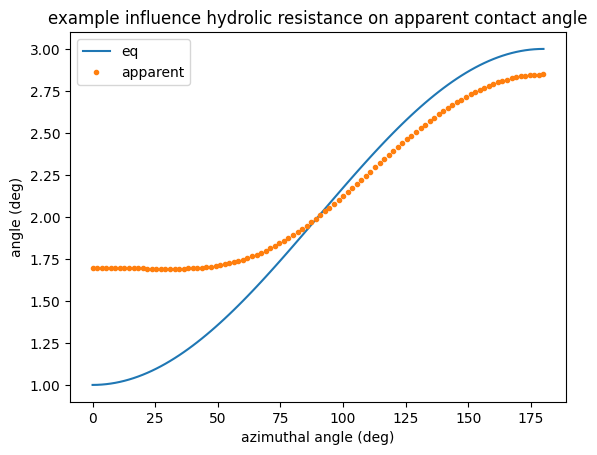

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math

angle = np.linspace(0, np.pi, 100)
theta_eq = (np.sin(angle-np.pi/2) + 2) * np.pi / 180
Ca = 1E-6 * np.sin(angle-np.pi/2)
x = 3E-3   #capillary length, ongeveer 3mm
l = 3E-2       #slip length
theta_app = (theta_eq**3 + 9*Ca*np.log(x/l))**(1/3)
#theta_app = (theta_eq**3 + 10)**(1/3)
fig1, ax1 = plt.subplots()
ax1.plot(angle*180/np.pi, theta_eq * 180 / np.pi, label='eq')
ax1.plot(angle*180/np.pi, theta_app * 180 / np.pi, '.', label = 'apparent')
ax1.set(xlabel='azimuthal angle (deg)', ylabel='angle (deg)', title='example influence hydrolic resistance on apparent contact angle')
ax1.legend(loc='best')